# A Simple Autoencoder

First, Autoencoder was designed for data compression without engineer's hands. Compression and decompression functions are learned from data itself. But, Its performance is worse than traditional compression algorithm such as jpeg. By the way, Autoencoder also makes good performance in **image denoising and dimensionality reduction.**

<img src="assets/compression.png" alt="Drawing" style="width: 500px;"/>

<img src="assets/bottleneck.png" alt="Drawing" style="width: 500px;"/>

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a **compressed representation of the input.** Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\gauss\Anaconda3\envs\mldl\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

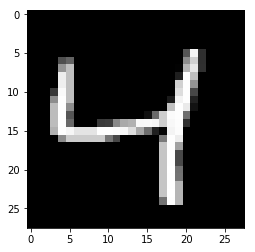

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1] # (784)

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs') # (?, 784)
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets') # (?, 784)

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu) # (784, 32)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None) # (32, 784)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6938
Epoch: 1/20... Training loss: 0.6909
Epoch: 1/20... Training loss: 0.6878
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6801
Epoch: 1/20... Training loss: 0.6747
Epoch: 1/20... Training loss: 0.6679
Epoch: 1/20... Training loss: 0.6598
Epoch: 1/20... Training loss: 0.6498
Epoch: 1/20... Training loss: 0.6387
Epoch: 1/20... Training loss: 0.6273
Epoch: 1/20... Training loss: 0.6125
Epoch: 1/20... Training loss: 0.5985
Epoch: 1/20... Training loss: 0.5815
Epoch: 1/20... Training loss: 0.5627
Epoch: 1/20... Training loss: 0.5452
Epoch: 1/20... Training loss: 0.5279
Epoch: 1/20... Training loss: 0.5123
Epoch: 1/20... Training loss: 0.4867
Epoch: 1/20... Training loss: 0.4764
Epoch: 1/20... Training loss: 0.4494
Epoch: 1/20... Training loss: 0.4387
Epoch: 1/20... Training loss: 0.4213
Epoch: 1/20... Training loss: 0.4065
Epoch: 1/20... Training loss: 0.3960
Epoch: 1/20... Training loss: 0.3762
Epoch: 1/20... Training loss: 0.3701
E

Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1994
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1957
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1820
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1826
E

Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1479
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1613
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1493
E

Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1313
E

Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1219
E

Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1198
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1201
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1149
E

Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1047
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1042
E

Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1036
E

Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1039
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1016
E

Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0975
E

Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.1042
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.1014
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0937
E

Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0996
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0896
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0992
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0880
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0888
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0867
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0989
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0992
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0882
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

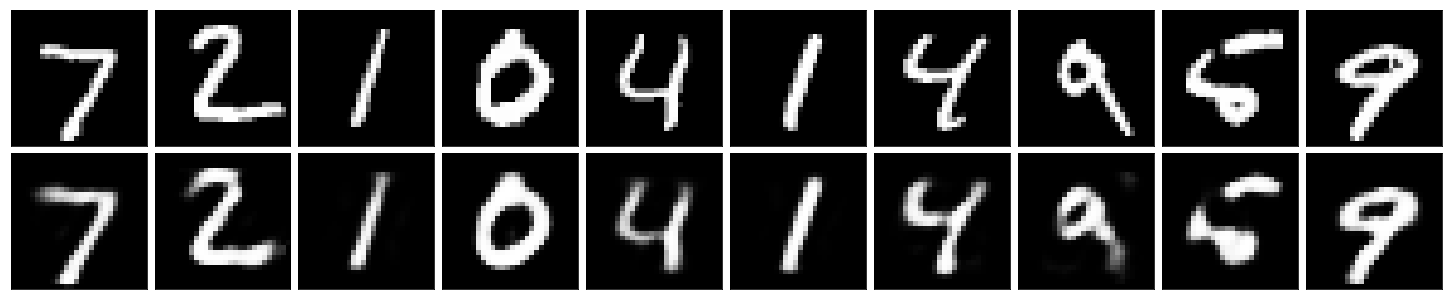

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.